# System Identification

System identification is the process of finding a transfer function that predicts outputs
that are close to those predicted by experimental data. These data
may be obtained from actual experiments for from a detailed nonlinear model.
System identification involves: iteratively choosing the size of the numerator and denominator polynomial
of the transfer function,
estimating the parameters of the transfer function, and evaluating the quality of the fit to
the predictions of the transfer function.

## Preliminaries

In [1]:
!pip install controlSBML
!pip install control


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import controlSBML as ctl

import matplotlib.pyplot as plt
import control
import numpy as np
import pandas as pd
import tellurium as te
ctl.__version__

'1.2.4'

In [3]:
s = control.TransferFunction.s

## Models

### LINEAR_MODEL

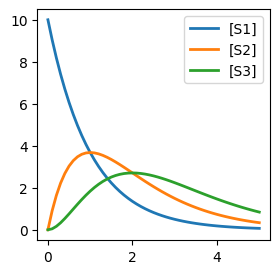

In [4]:
LINEAR_MODEL = """
model *model_main()
J1: S1 -> S2; k1*S1
J2: S2 -> S3; k2*S2
J3: S3 -> ; k3*S3
S1 = 10; S2 = 0; S3 = 0

k1 = 1
k2 = 1
k3 = 1
end
"""
rr = te.loada(LINEAR_MODEL)
rr.simulate()
rr.plot(figsize=(3,3))

In [5]:
LINEAR_CTLSB = ctl.ControlSBML(LINEAR_MODEL, input_names=["S1"], output_names=["S3"])

ValueError: Invalid keyword arguments: {'input_names', 'output_names'}

### WOLF_MODEL

In [ ]:
WOLF_URL = "https://www.ebi.ac.uk/biomodels/model/download/BIOMD0000000206.2?filename=BIOMD0000000206_url.xml"
rr = te.loadSBMLModel(WOLF_URL)
WOLF_MODEL = rr.getAntimony()
WOLF_CTLSB = ctl.ControlSBML(WOLF_MODEL, input_names=["at_"], output_names=["s5"])
print(WOLF_MODEL)

In [ ]:
rr = te.loada(WOLF_MODEL)
rr.simulate()
rr.plot()

### MTOR_MODEL

In [ ]:
MTOR_URL = "https://www.ebi.ac.uk/biomodels/model/download/BIOMD0000000823.2?filename=Varusai2018.xml"
rr = te.loadSBMLModel(MTOR_URL)
MTOR_MODEL = rr.getAntimony()
MTOR_CTLSB = ctl.ControlSBML(MTOR_MODEL, input_names=["DEPTOR"], output_names=["mTORC1"])
print(MTOR_MODEL)

In [ ]:
rr = te.loada(MTOR_MODEL)
rr.simulate()
rr.plot()

# Linear model transfer function

In this section, we use LINEAR_MODEL to illustrate system identification.
The work can be simplied by making use of the ``SISOTransferFunctionBuilder``
object in ``ControlSBML``.

## Step 1. Determine the operating region

The operating region is the range of control inputs that should handled by the controller.
We want to see how responsive the system is to the possible outputs from the controller.
We assess the operating region by using a *staircase input*.
This is a sequence of steps of the same height that have a duration that is sufficiently
long so that the system stabilizes.

In [ ]:
STAIRCASE = LINEAR_CTLSB.plotStaircaseResponse(times=np.linspace(0, 200, 2000))

## Step 2. Find the transfer function

To fit a transfer function, we must specify the number of terms in the
numerator and denominator polynomials for the transfer function.

In [ ]:
?LINEAR_CTLSB.plotTransferFunctionFit

In [ ]:
result = LINEAR_CTLSB.plotTransferFunctionFit(num_numerator=1, num_denominator=2, times=np.linspace(0, 200, 2000))

In [ ]:
LINEAR_TF = 0.05/(.11*s + 0.05)

In [ ]:
LINEAR_TF.poles()

In [ ]:
LINEAR_TF.dcgain()

#  Wolf Transfer Function

In [ ]:
WOLF_CTLSB = ctl.ControlSBML(WOLF_MODEL, input_names=["s1"], output_names=["s5"])

## Determine the operating region

In [ ]:
_ = WOLF_CTLSB.plotStaircaseResponse(times=np.linspace(0, 30, 300), initial_value=10, final_value=50)

## Find the transfer function

In [ ]:
_ = WOLF_CTLSB.plotTransferFunctionFit(times=np.linspace(0, 30, 300), initial_value=10, final_value=50,
                                      fit_start_time=5)

In [ ]:
_ = WOLF_CTLSB.plotTransferFunctionFit(num_numerator=4, num_denominator=5, times=np.linspace(0, 30, 300),
                                       fit_start_time=5, initial_value=10, final_value=50, ylim=[0, 50])

In [ ]:
WOLF_TF = (-9.1*s**3 - 4.06*s**2 -3.59*s - 9.19)/(-7.88*s**4 - 8.61*s**3 - 8.87*s**2 - 7.89*s - 8.58)
WOLF_TF.poles()

# mTOR transfer function

In [ ]:
MTOR_CTLSB = ctl.ControlSBML(MTOR_MODEL, input_names=["V1"], output_names=["pmTORC1", "pmTORC2"])